In [91]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

In [92]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [93]:
print(f'Image DType: {type(x_train)}')
print(f'Image Element DType: {type(x_train[0,0,0])}')
print(f'Label Element DType: {type(y_train[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {x_train.shape}')
print(f'Labels: {y_train.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {x_test.shape}')
print(f'Labels: {y_test.shape}')
print('Image Data Range:')
print(f'Min: {x_train.min()}')
print(f'Max: {x_train.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


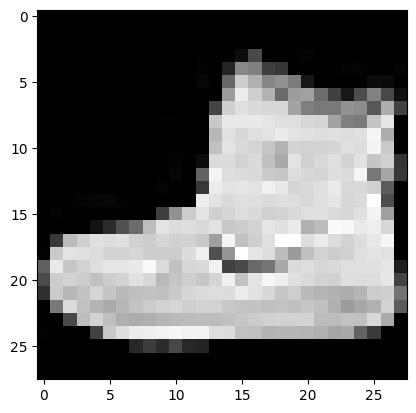

In [94]:
# plot the first image in the training set in grayscale
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray') 

It is an ankle boot. 9 -> ankleboot

In [95]:
print(f'Label: {y_train[0]}')

Label: 9


Let's see the distribution of the labels in the training set and test set.

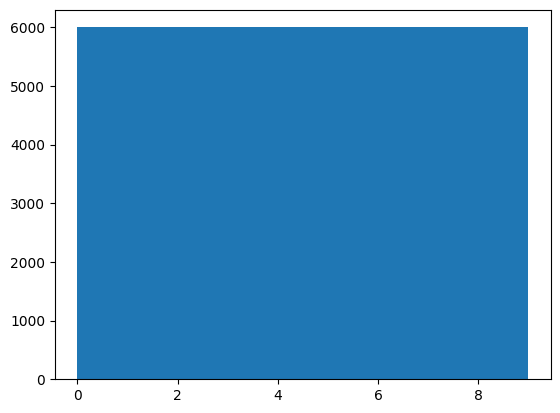

In [96]:
import matplotlib.pyplot as plt

plt.hist(y_train)
plt.show()

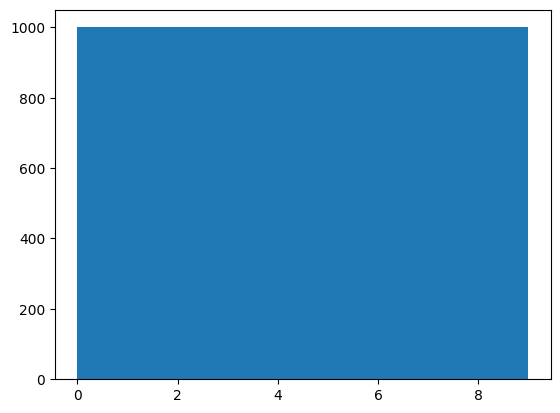

In [97]:
plt.hist(y_test)
plt.show()

As we see from histograms, each label in train and test data are equally distributed.

In [98]:
y_train[20:35]

array([3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0], dtype=uint8)

Now, flatten our images into 1-d array, which means return from 28x28 -> 784x1

In [99]:
train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

Normalizing the data to the range [0,1] by min-max range, and casting it to float32

In [100]:
train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

Build the model from Keras layers. I set 128 nodes for the first dense layer. As an activation function, I selected Relu.

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

I selected the optimizer as 'adam'. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [102]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model in 10 iterations

In [103]:
model.fit(train_images, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.8107
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4083 - accuracy: 0.8556
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3663 - accuracy: 0.8700
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3388 - accuracy: 0.8791
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3219 - accuracy: 0.8836
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3052 - accuracy: 0.8893
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2908 - accuracy: 0.8937
Epoch 8/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2812 - accuracy: 0.8977
Epoch 9/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2692 - accuracy: 0.9012
Epoch 10/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2632 - accuracy: 0.9037

In [104]:
test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3373 - accuracy: 0.8809 - 221ms/epoch - 707us/step

Test accuracy: 0.8809000253677368


In [105]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In order to get probabilities for each class, add one more layer, which is Softmax. The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution.

In [116]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [117]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 507us/step


In [107]:
predictions.shape

(10000, 10)

argmax function returns the index of the label with highest probability.

In [108]:
y_argmax_prediction = np.argmax(predictions, axis=1)

Create confusion matrix and view precision and recall scores, also calculate f1 score

In [109]:
confusion_matrix(y_test, y_argmax_prediction)

array([[865,   0,   8,  15,   3,   2, 103,   0,   4,   0],
       [  4, 970,   0,  19,   2,   0,   4,   0,   1,   0],
       [ 13,   2, 779,  17, 114,   0,  75,   0,   0,   0],
       [ 35,   8,  12, 900,  13,   0,  27,   0,   5,   0],
       [  0,   1,  80,  58, 801,   0,  60,   0,   0,   0],
       [  0,   0,   0,   1,   0, 954,   0,  29,   1,  15],
       [135,   3,  78,  25,  83,   0, 674,   0,   2,   0],
       [  0,   0,   0,   0,   0,  12,   0, 975,   0,  13],
       [  5,   0,   6,   6,   5,   3,  15,   6, 954,   0],
       [  0,   0,   0,   1,   0,   5,   1,  56,   0, 937]], dtype=int64)

I adjusted them as 'weighted' because, it is a multi class classification. weighted means: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [110]:
precision = precision_score(y_test, y_argmax_prediction , average='weighted')
recall = recall_score(y_test, y_argmax_prediction, average='weighted')
f1score = f1_score(y_test, y_argmax_prediction, average='weighted')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8813754610346598
Recall = 0.8809
F1 Score = 0.880794270321544


I will use two graph drawing methods to examine some predictions the model made.

In [114]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [115]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


When we look at the first image, it correctly classifies the ankle boot. As we see from the histogram, label 9(Ankle Boot) has the highest probability. And confidence level is high with 94%. 

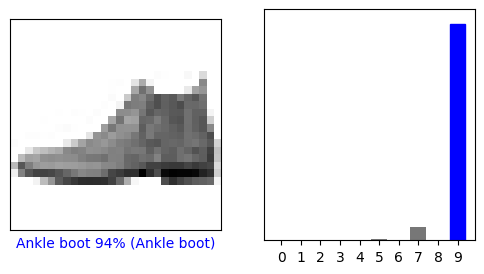

In [118]:
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


When we look at a misclassified image, we see that its confidence level is low, which is 65%. In the histogram, we also see that ther labels are more visible. Actually, 5(Sandal) and 7(Sneaker) are more similar images so that they can be more confusable by algorithm.

In [121]:
print(class_names[5])
print(class_names[7])

Sandal
Sneaker


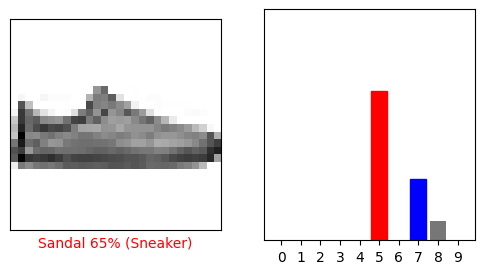

In [120]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

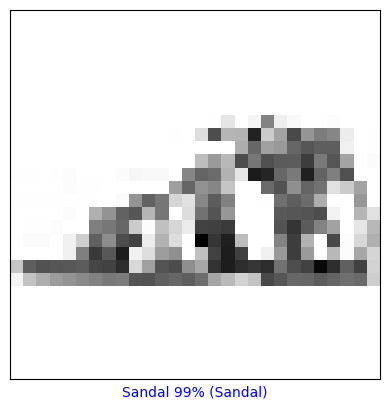

In [132]:
i = 11
plot_image(i, predictions[i], y_test, x_test)

The overall shape of the sandal example and sneaker example above resembles each other in therms of shape. There may be more sandal and sneaker samples collected to achieve more accurate classification.